----
---

# Simulating Network Diffusion With NDlib
 <span><img src=attachment:image.png   align='middle'/></span>
----
---


[**NDlib**](https://ndlib.readthedocs.io/en/latest/overview.html) is a Python language software package for the describing, simulate, and study diffusion processes on complex networks.
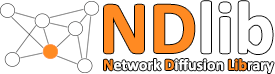

NDlib is built upon the `NetworkX ` python library and is intended to provide:

- tools for the study diffusion dynamics on social, biological, and infrastructure networks,
- a standard programming interface and diffusion models 
- implementation that is suitable for many applications,
a rapid development environment for collaborative, multidisciplinary, projects.

## Install

In [5]:
pip install ndlib

Note: you may need to restart the kernel to use updated packages.


## Tutorial
https://ndlib.readthedocs.io/en/latest/tutorial.html

In [26]:
import networkx as nx
import ndlib.models.epidemics as ep
import ndlib.models.ModelConfig as mc
from bokeh.io import output_notebook, show
from ndlib.viz.bokeh.DiffusionTrend import DiffusionTrend
from ndlib.viz.bokeh.DiffusionPrevalence import DiffusionPrevalence
from ndlib.viz.bokeh.MultiPlot import MultiPlot

### SIR 

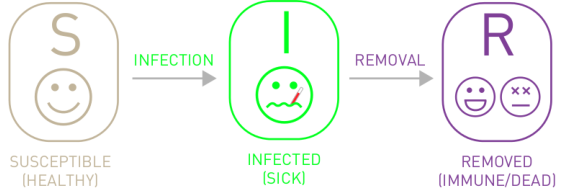

<span><img src=attachment:image.png   width = '400px' align='middle'/></span>

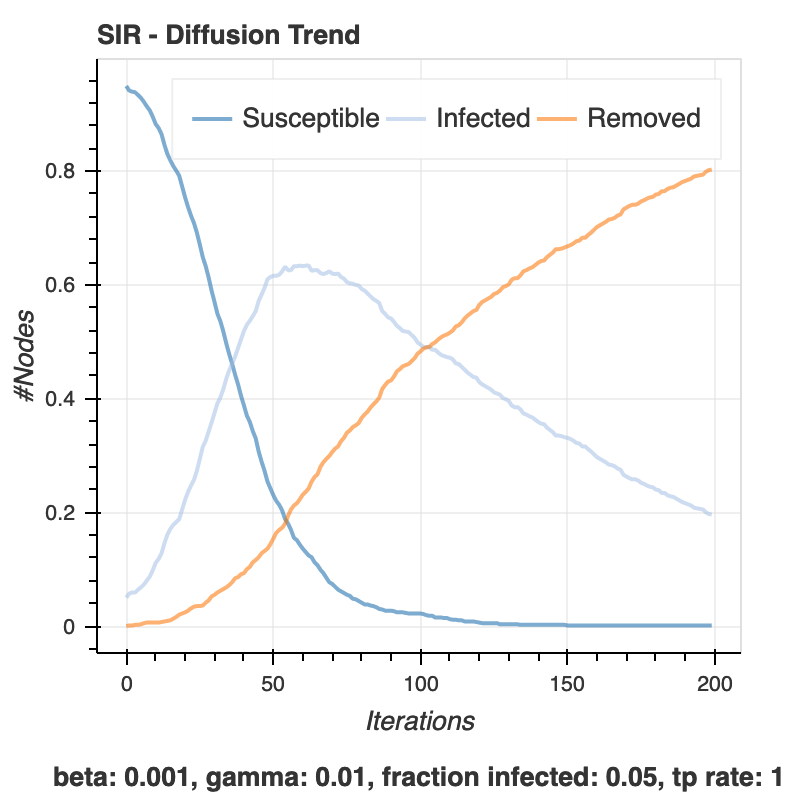

In [2]:
# Network Definition
g = nx.erdos_renyi_graph(1000, 0.1)

# Model Selection
model = ep.SIRModel(g)

In [3]:
# Model Configuration
config = mc.Configuration()
config.add_model_parameter('beta', 0.001)
config.add_model_parameter('gamma', 0.01)
config.add_model_parameter("fraction_infected", 0.05)
model.set_initial_status(config)

In [4]:
# Simulation
iterations = model.iteration_bunch(200)
trends = model.build_trends(iterations)

100%|██████████| 200/200 [00:01<00:00, 183.84it/s]


In [6]:
output_notebook() # show bokeh in notebook
viz = DiffusionTrend(model, trends)
p = viz.plot(width=400, height=400)
show(p)

Loading BokehJS ...

In [7]:
viz2 = DiffusionPrevalence(model, trends)
p2 = viz2.plot(width=400, height=400)
show(p2)

In [8]:
vm = MultiPlot()
vm.add_plot(p)
vm.add_plot(p2)
m = vm.plot()
show(m)

### Kertesz Threshold model

The Kertesz Threshold model was introduced in 2015 by `Ruan` et al. [1] and it is an extension of the Watts threshold model [2].

We set the initial infected as well blocked node sets equals to the 10% of the overall population, assign a threshold of 0.25 to all the nodes and impose an probability of spontaneous adoptions of 40%.

- [1]	Z. Ruan, G. In ̃iguez, M. Karsai, and J. Kertész, “Kinetics of social contagion,” Phys. Rev. Lett., vol. 115, p. 218702, Nov 2015.
- [2]	D.J. Watts, “A simple model of global cascades on random networks,” Proceedings of the National Academy of Sciences, vol. 99, no. 9, pp. 5766–5771, 2002.

In [18]:
# Network topology
g = nx.erdos_renyi_graph(1000, 0.1)

# Model selection
th_model = ep.KerteszThresholdModel(g)

# Model Configuration
config = mc.Configuration()
config.add_model_parameter('adopter_rate', 0.4)
config.add_model_parameter('percentage_blocked', 0.1)
config.add_model_parameter('fraction_infected', 0.1)

# Setting node parameters
threshold = 0.25
for i in g.nodes():
    config.add_node_configuration("threshold", i, threshold)

th_model.set_initial_status(config)

# Simulation execution
iterations = th_model.iteration_bunch(200)

100%|██████████| 200/200 [00:00<00:00, 207.32it/s]


In [19]:
output_notebook() # show bokeh in notebook

trends = th_model.build_trends(iterations)

viz = DiffusionTrend(th_model, trends)
p = viz.plot(width=400, height=400)
show(p)

Loading BokehJS ...

In [20]:
viz2 = DiffusionPrevalence(th_model, trends)
p2 = viz2.plot(width=400, height=400)
show(p2)

### Model Comparisions

In [9]:
# model comparisions
vm = MultiPlot()
vm.add_plot(p)

# SIS
sis_model = ep.SISModel(g)
config = mc.Configuration()
config.add_model_parameter('beta', 0.001)
config.add_model_parameter('lambda', 0.01)
config.add_model_parameter("fraction_infected", 0.05)
sis_model.set_initial_status(config)
iterations = sis_model.iteration_bunch(200)
trends = sis_model.build_trends(iterations)

viz = DiffusionTrend(sis_model, trends)
p3 = viz.plot(width=400, height=400)
vm.add_plot(p3)

# SI
si_model = ep.SIModel(g)
config = mc.Configuration()
config.add_model_parameter('beta', 0.001)
config.add_model_parameter("fraction_infected", 0.05)
si_model.set_initial_status(config)
iterations = si_model.iteration_bunch(200)
trends = si_model.build_trends(iterations)

viz = DiffusionTrend(si_model, trends)
p4 = viz.plot(width=400, height=400)
vm.add_plot(p4)

# Threshold
th_model = ep.ThresholdModel(g)
config = mc.Configuration()

# Set individual node threshold
threshold = 0.40
for n in g.nodes():
    config.add_node_configuration("threshold", n, threshold)

config.add_model_parameter("fraction_infected", 0.30)
th_model.set_initial_status(config)
iterations = th_model.iteration_bunch(60)
trends = th_model.build_trends(iterations)

viz = DiffusionTrend(th_model, trends)
p5 = viz.plot(width=400, height=400)
vm.add_plot(p5)

m = vm.plot()
show(m)

100%|██████████| 60/60 [00:00<00:00, 94.43it/s] 


# Threshold model
The threshold model was introduced in 1978 by Granovetter [1]. A node has two distinct and mutually exclusive behavioral alternatives, e.g., the decision to do or not do something. Individual decision depends on the percentage of `its neighbors` have made the same choice, thus imposing a threshold.
- each node has its own threshold; 
- during a generic iteration every node is observed: 
    - if the percentage of its infected neighbors is grater than its threshold it becomes infected as well.
    
Granovetter, “Threshold models of collective behavior,” The American Journal of Sociology, vol. 83, no. 6, pp. 1420–1443, 1978.

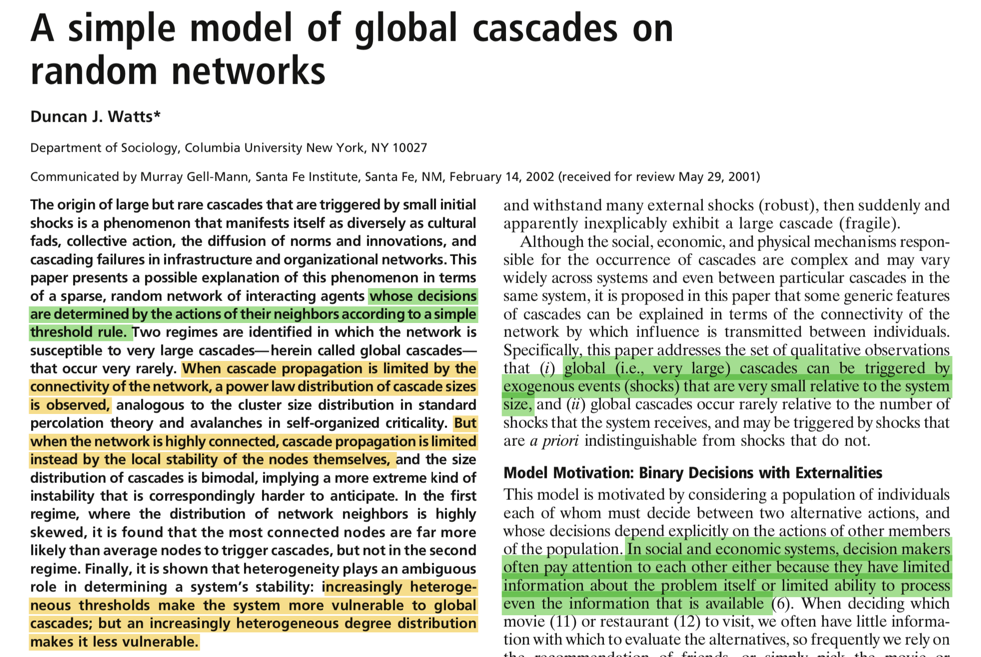

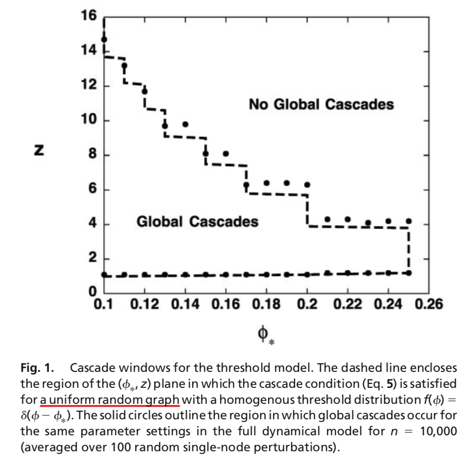

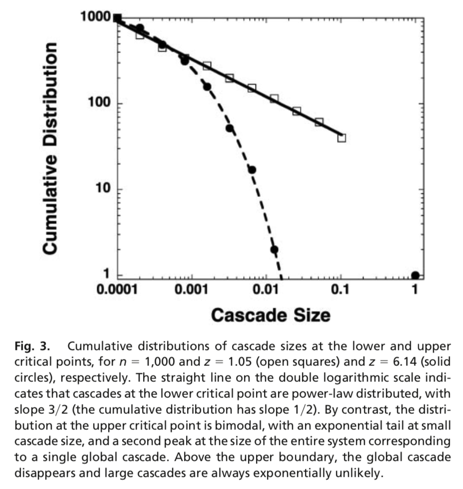

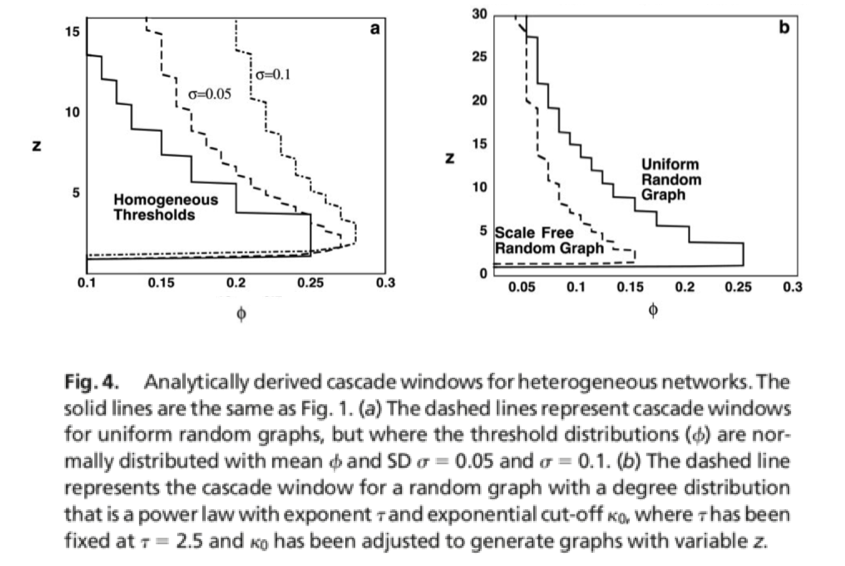

In [92]:
import networkx as nx
import ndlib.models.ModelConfig as mc
import ndlib.models.epidemics as ep

# change these two parameters
num_neighbors = 1
threshold = 0.8

# Network topology
#g = nx.erdos_renyi_graph(1000, 0.1)
g = nx.barabasi_albert_graph(1000, num_neighbors)

# Model selection
model = ep.ThresholdModel(g)

# Model Configuration
config = mc.Configuration()
config.add_model_parameter('fraction_infected', 0.1)

# Setting node parameters
for i in g.nodes():
    config.add_node_configuration("threshold", i, threshold)

model.set_initial_status(config)

# Simulation execution
iterations = model.iteration_bunch(30)

100%|██████████| 30/30 [00:00<00:00, 435.57it/s]


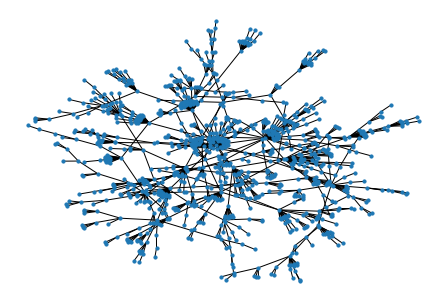

In [93]:
nx.draw(g, node_size = 10)

In [94]:
output_notebook() # show bokeh in notebook
trends = model.build_trends(iterations)
viz = DiffusionTrend(model, trends)
p = viz.plot(width=400, height=400)

viz2 = DiffusionPrevalence(model, trends)
p2 = viz2.plot(width=400, height=400)

Loading BokehJS ...

In [95]:
vm = MultiPlot()
vm.add_plot(p)
vm.add_plot(p2)
m = vm.plot()
show(m)

# General Threshold
The General Threshold model was introduced in 2003 by Kempe [1].

In this model, during an epidemics, a node is allowed to change its status from Susceptible to Infected.

At time t nodes become Infected if the sum of the weight of the infected neighbors is greater than the threshold

- David Kempe , Jon Kleinberg, and Éva Tardos. “Maximizing the spread of influence through a social network.” Proceedings of the ninth ACM SIGKDD international conference on Knowledge discovery and data mining. ACM, 2003.

https://ndlib.readthedocs.io/en/latest/reference/models/epidemics/GeneralThreshold.html

# Generalised Threshold
It was introduced in 2017 by Török and Kertesz [1]. In this model, a node is allowed to change its status from Susceptible to Infected. The model is instantiated on a graph having a non-empty set of infected nodes. 

- At time `t` nodes become Infected with rate `mu t/tau`
- Nodes for which the ratio of the active friends dropped below the threshold are moved to the Infected queue
- Nodes in the Infected queue become infected with rate tau. If this happens check all its friends for threshold


> János Török and János Kertész “Cascading collapse of online social networks” Scientific reports, vol. 7 no. 1, 2017 


https://ndlib.readthedocs.io/en/latest/reference/models/epidemics/GeneralisedThreshold.html

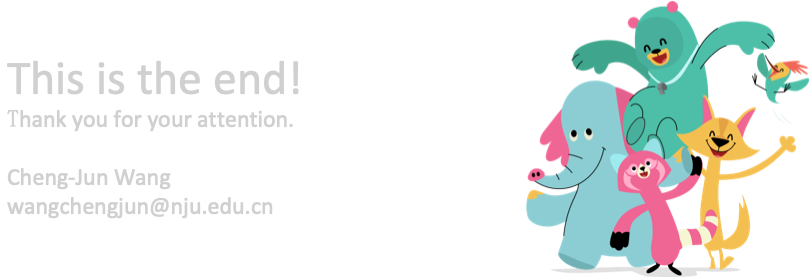